In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

<Figure size 432x288 with 0 Axes>

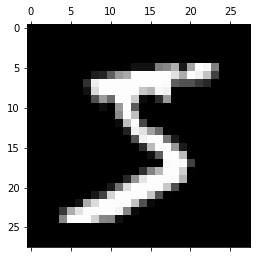

In [3]:
plt.gray()
plt.matshow(X_train[0])

In [4]:
X_train_flattened=X_train.reshape(len(X_train),28*28)/255
X_test_flattened=X_test.reshape(len(X_test),28*28)/255

In [5]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
model.fit(X_train_flattened,y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4855 - accuracy: 0.8799
Epoch 2/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.3052 - accuracy: 0.9154
Epoch 3/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2853 - accuracy: 0.9209
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2745 - accuracy: 0.9243
Epoch 5/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.2676 - accuracy: 0.9262


In [8]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.2648 - accuracy: 0.9262


[0.2647784291088581, 0.9262]

In [9]:
predict=model.predict(X_test_flattened)

In [10]:
predict_labels=[np.argmax(i) for i in  predict]

In [11]:
model.evaluate(X_test_flattened,y_test)

10000/10000 [==============================] - 0s 24us/sample - loss: 0.2648 - accuracy: 0.9262


[0.2647784291088581, 0.9262]

In [12]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=predict_labels)

Text(69.0, 0.5, 'Prediction')

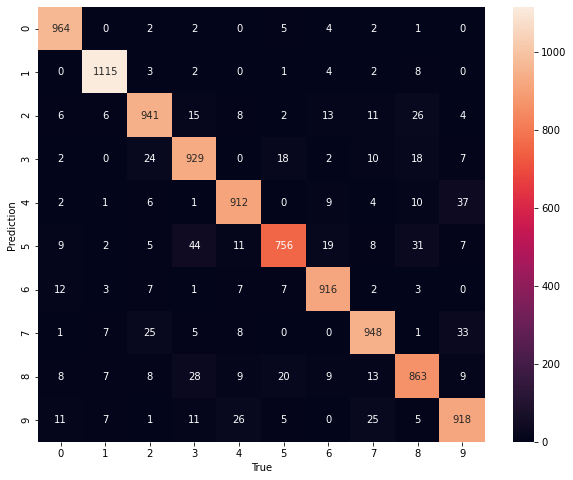

In [13]:
import seaborn as sn
plt.figure(figsize=(10,8))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('True')
plt.ylabel('Prediction')